# Customer Segmentation using K-means clustering & PCA

## **1. Objectives**

-  Clustering customers that behave the same

- Investigate the common traits/behaviors in each Cluster

- Deploy the results in Power BI for the business to use

- Automate all this process for future data



## **2. Work Sequence:** Excel -> SQL Server-> Python -> SQL Server -> Power BI

## **3. Installing / Importing packAges**

In [62]:
#!pip install pypyodbc

In [63]:
import pandas as pd
import numpy as np
import sqlalchemy
import pypyodbc as podbc

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, k_means
%matplotlib inline

# Adjust the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

import warnings
warnings.filterwarnings('ignore')

## 4. **Extract the Data**: from SQL Server

In [64]:
conn = sqlalchemy.create_engine('mssql+pyodbc://AMIRA/Projects?trusted_connection=yes&driver=ODBC Driver 17 for SQL Server')
print('Connection Established...')

Connection Established...


In [65]:
data = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data]''', conn)

In [66]:
data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How_often_you_attend_Entertaining_events_in_a_year,Social_Media,How_many_hours_are_you_willing_to_travel_to_attend_an_event,Do_you_enjoy_adrenaline_rush_activities,Are_food_areas_coffee_areas_bars_toilets_important_to_you,What_is_your_favourite_attraction_from_below,Were_you_satisfied_with_the_last_event_you_attended_with_us,Would_you_recommend_our_events_to_other_people,Did_you_find_our_events_value_for_money
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727428,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526596,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [67]:
data.shape

(14783, 19)

In [68]:
data.drop(columns=['latitude', 'longitude'], inplace=True)

In [69]:
data.shape

(14783, 17)

## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning


In [70]:
# Checking for null values
data.isnull().sum()

CUSTOMER                                                       0
Age                                                            0
Gender                                                         0
Postcode                                                       0
District                                                       0
Constituency                                                   0
Current_Status                                                 0
Total_Household_Income                                         5
How_often_you_attend_Entertaining_events_in_a_year             5
Social_Media                                                   5
How_many_hours_are_you_willing_to_travel_to_attend_an_event    5
Do_you_enjoy_adrenaline_rush_activities                        5
Are_food_areas_coffee_areas_bars_toilets_important_to_you      5
What_is_your_favourite_attraction_from_below                   5
Were_you_satisfied_with_the_last_event_you_attended_with_us    5
Would_you_recommend_our_e

In [71]:
data[data['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,Current_Status,Total_Household_Income,How_often_you_attend_Entertaining_events_in_a_year,Social_Media,How_many_hours_are_you_willing_to_travel_to_attend_an_event,Do_you_enjoy_adrenaline_rush_activities,Are_food_areas_coffee_areas_bars_toilets_important_to_you,What_is_your_favourite_attraction_from_below,Were_you_satisfied_with_the_last_event_you_attended_with_us,Would_you_recommend_our_events_to_other_people,Did_you_find_our_events_value_for_money
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,Married with children,None,None,None,None,None,None,None,None,None,None
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,Married with children,None,None,None,None,None,None,None,None,None,None
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,Married with children,None,None,None,None,None,None,None,None,None,None
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,Married with children,None,None,None,None,None,None,None,None,None,None
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,Married with children,None,None,None,None,None,None,None,None,None,None


In [72]:
# Deleting the NULL values
data = data.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(data.shape)

# Visualize the NULL observations
data.isnull().sum()

(14778, 17)


CUSTOMER                                                       0
Age                                                            0
Gender                                                         0
Postcode                                                       0
District                                                       0
Constituency                                                   0
Current_Status                                                 0
Total_Household_Income                                         0
How_often_you_attend_Entertaining_events_in_a_year             0
Social_Media                                                   0
How_many_hours_are_you_willing_to_travel_to_attend_an_event    0
Do_you_enjoy_adrenaline_rush_activities                        0
Are_food_areas_coffee_areas_bars_toilets_important_to_you      0
What_is_your_favourite_attraction_from_below                   0
Were_you_satisfied_with_the_last_event_you_attended_with_us    0
Would_you_recommend_our_e

In [73]:
# Investigate all the elements whithin each Feature 

for column in data:
    unique_vals = np.unique(data[column])
    no_vals = len(unique_vals)
    if no_vals < 10:
        print('The number of values for feature {} :{} --{}'.format(column, no_vals, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, no_vals))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 --['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 --['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature Current_Status :8 --['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 --['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How_often_you_attend_Entertaining_events_in_a_year :5 --['1 Times a Year' '2 Times a Year' '3 Times a Year' '4 Times a Year'
 '5+ Times a Year']
The number 

In [74]:
# Getting the columns we need
data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'Current_Status', 'Total_Household_Income',
       'How_often_you_attend_Entertaining_events_in_a_year', 'Social_Media',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'Do_you_enjoy_adrenaline_rush_activities',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'What_is_your_favourite_attraction_from_below',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us',
       'Would_you_recommend_our_events_to_other_people',
       'Did_you_find_our_events_value_for_money'],
      dtype='object')

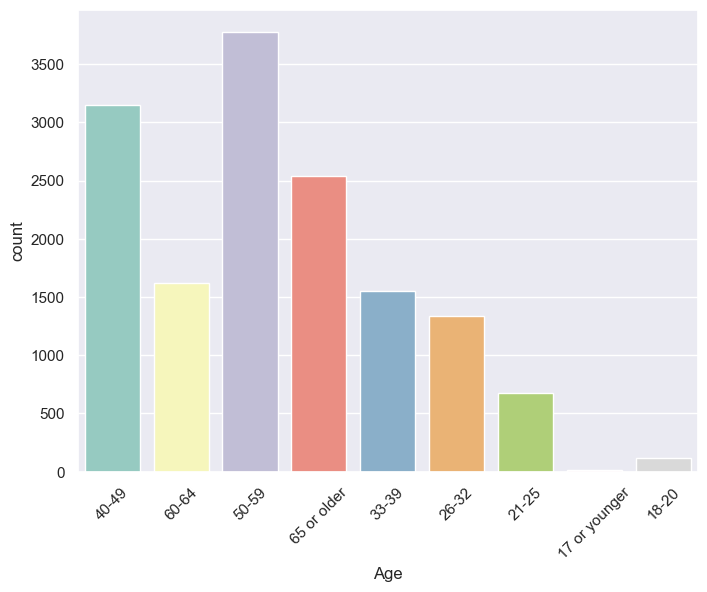

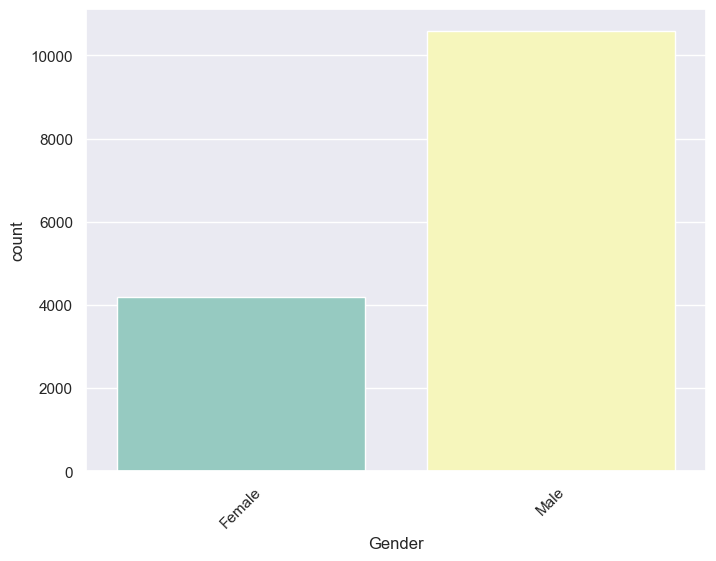

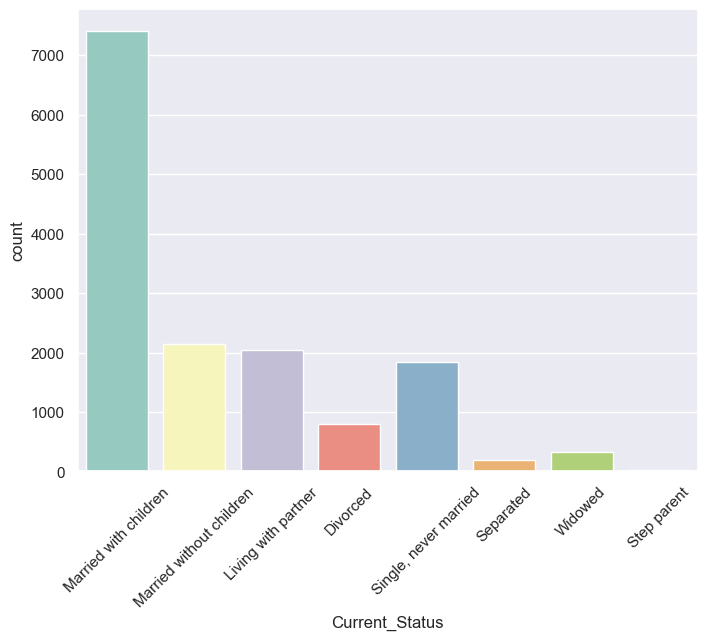

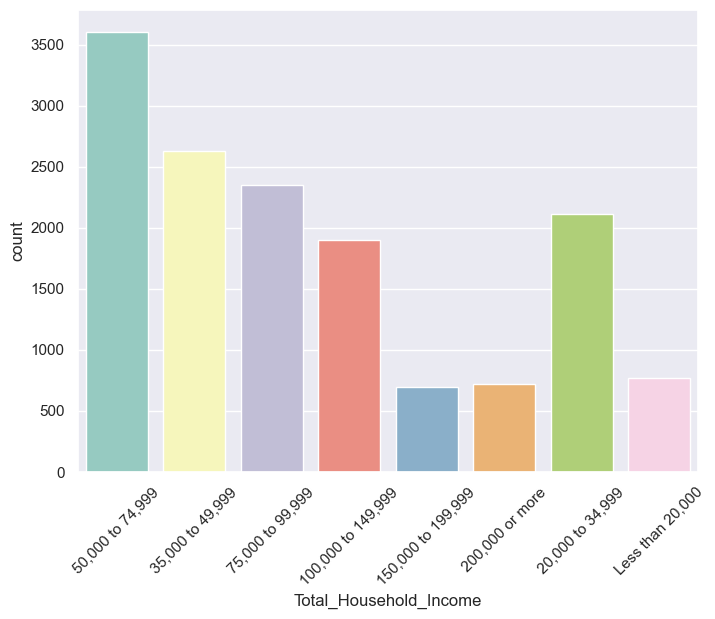

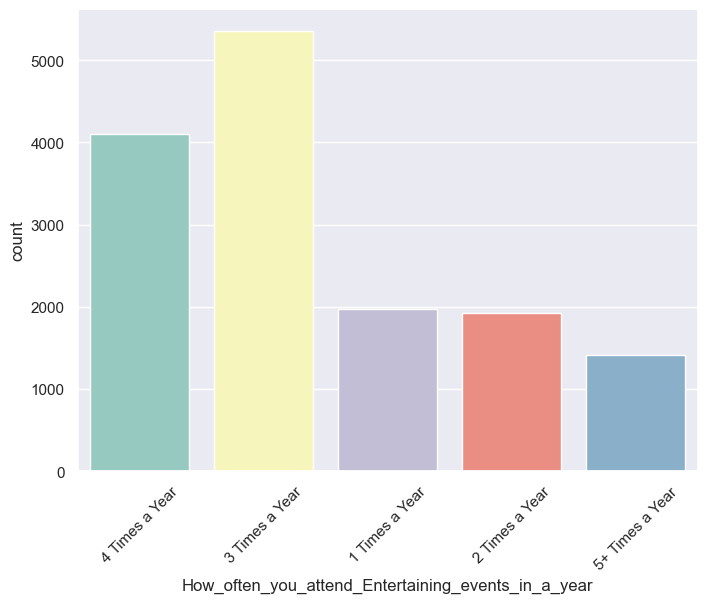

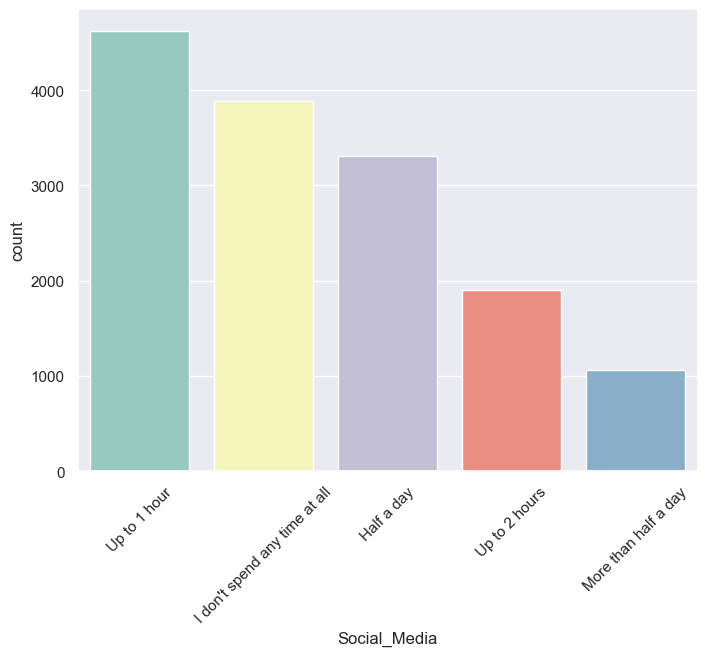

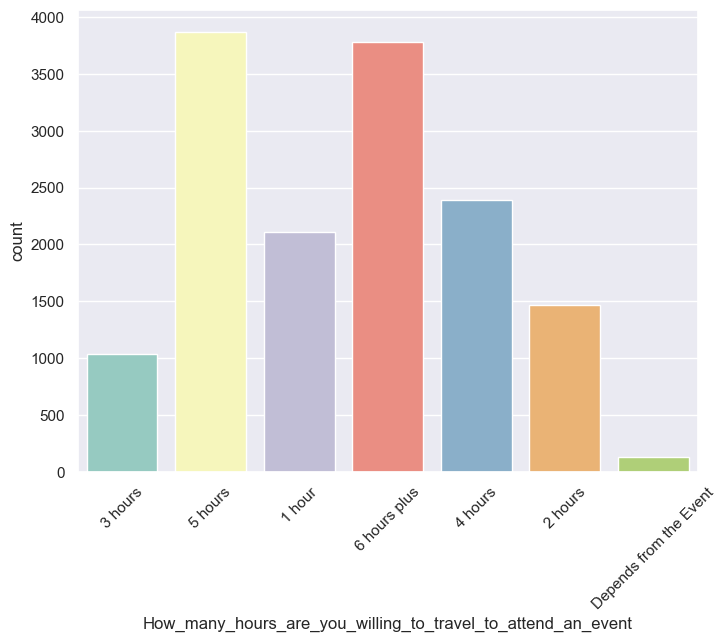

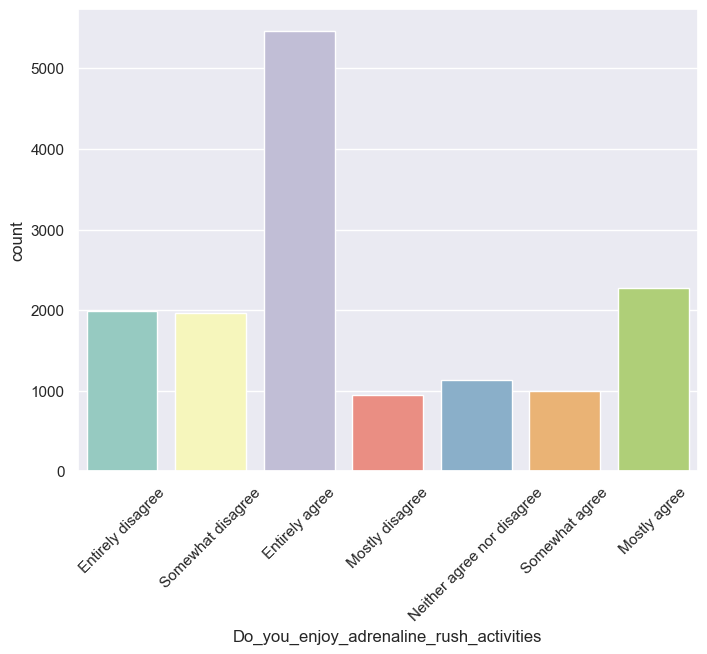

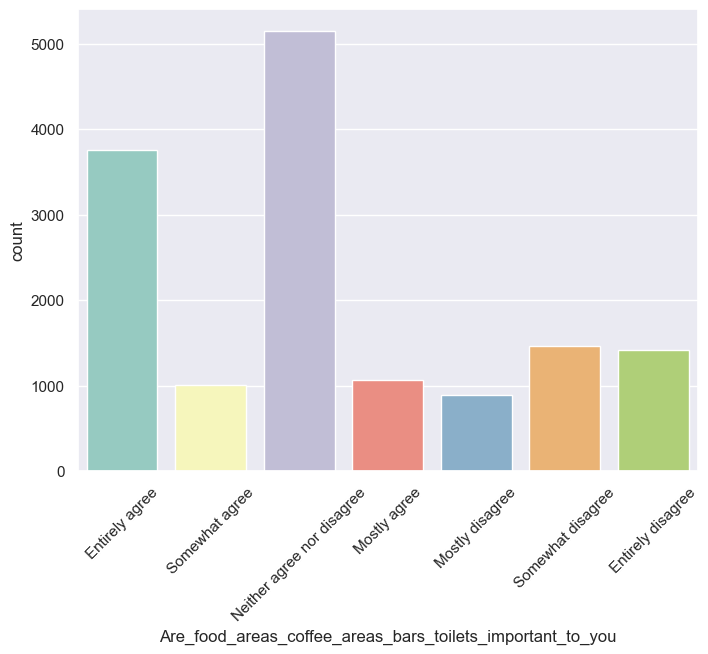

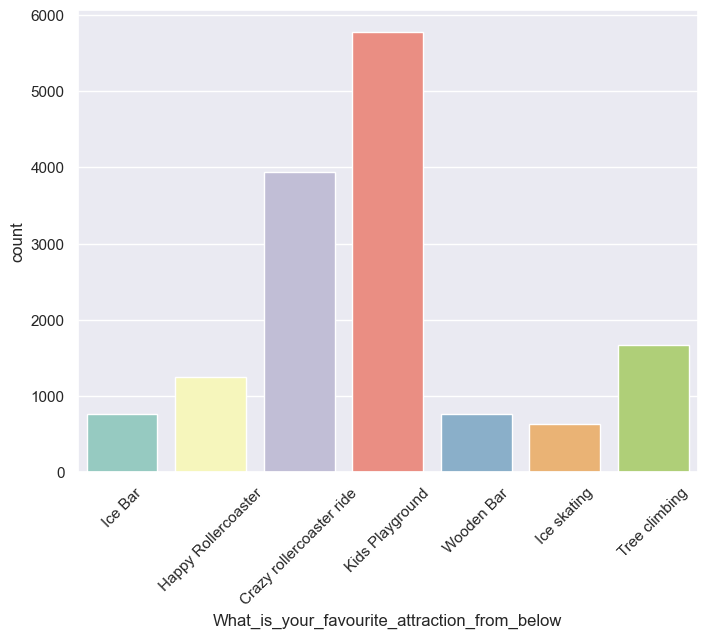

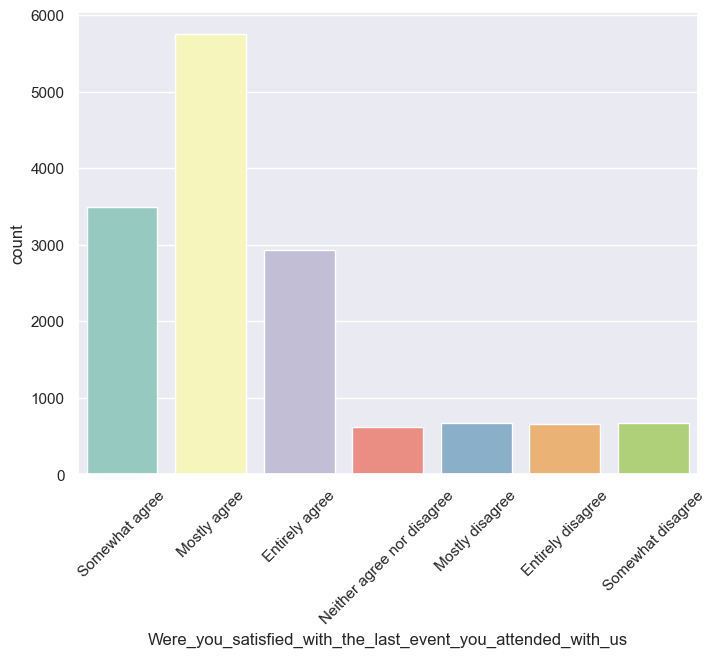

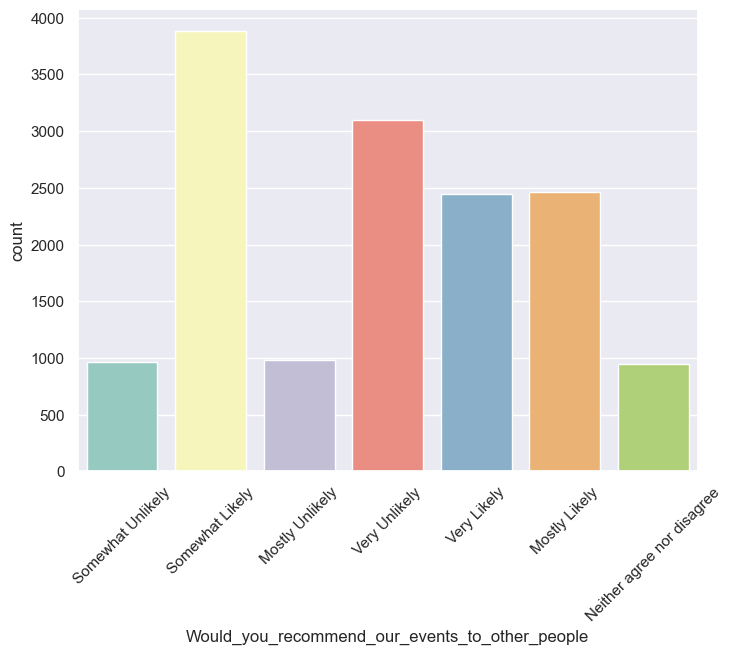

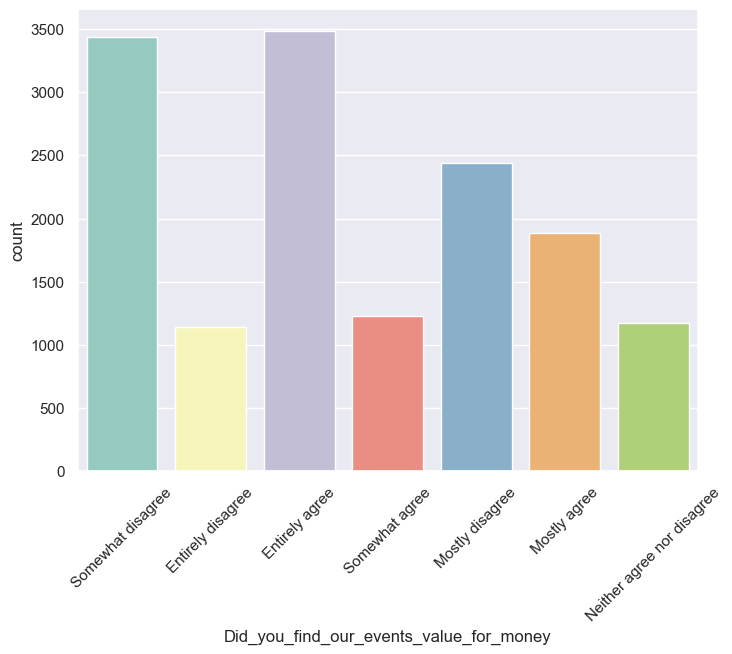

In [75]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender', 
       'Current_Status', 'Total_Household_Income',
       'How_often_you_attend_Entertaining_events_in_a_year', 'Social_Media',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'Do_you_enjoy_adrenaline_rush_activities',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'What_is_your_favourite_attraction_from_below','Were_you_satisfied_with_the_last_event_you_attended_with_us',
       'Would_you_recommend_our_events_to_other_people',
       'Did_you_find_our_events_value_for_money']

for f in features:
    sns.countplot(x = f, data = data, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    

### 5.2 Feature Engineering - Categorical Variables Encoding

In [76]:
print(data.shape)

# keeping the needed categorical columns
raw_data = data[features]
print(raw_data.shape)

# Encoding
new_raw_data = pd.get_dummies(raw_data, columns = features, dtype= int)

print(new_raw_data.shape)

new_raw_data.head()

(14778, 17)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would_you_recommend_our_events_to_other_people_Somewhat Unlikely,Would_you_recommend_our_events_to_other_people_Very Likely,Would_you_recommend_our_events_to_other_people_Very Unlikely,Did_you_find_our_events_value_for_money_Entirely agree,Did_you_find_our_events_value_for_money_Entirely disagree,Did_you_find_our_events_value_for_money_Mostly agree,Did_you_find_our_events_value_for_money_Mostly disagree,Did_you_find_our_events_value_for_money_Neither agree nor disagree,Did_you_find_our_events_value_for_money_Somewhat agree,Did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


## 6.0 K-means Clustering

In [77]:
X_train = new_raw_data.values

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# print the clusters assigned to each observation
print("The clusters are: ", kmeans.labels_)

# print the intertia 
print("The Intertia is: ", kmeans.inertia_)

The clusters are:  [3 1 1 ... 3 4 1]
The Intertia is:  101900.29058795146


In [78]:
kmeans.labels_.shape

(14778,)

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [79]:
# How to find the best number if Ks?

# Running K means with multible Ks
no_of_clusters = range(2,20)
inertia = []


for n in no_of_clusters:
    kmeans = KMeans(n_clusters=n, random_state=2)
    kmeans = kmeans.fit(X_train)
    i = kmeans.inertia_
    inertia.append(i)
    print("The inertia for :", n, "Clusters is:", i)

The inertia for : 2 Clusters is: 125619.02972065727
The inertia for : 3 Clusters is: 114905.38684266702
The inertia for : 4 Clusters is: 106337.17594801627
The inertia for : 5 Clusters is: 100865.16529237544
The inertia for : 6 Clusters is: 96432.6152774354
The inertia for : 7 Clusters is: 93814.47396613641
The inertia for : 8 Clusters is: 91696.57513876252
The inertia for : 9 Clusters is: 89724.98426328454
The inertia for : 10 Clusters is: 88496.26747372632
The inertia for : 11 Clusters is: 87575.77549915196
The inertia for : 12 Clusters is: 86617.6660888009
The inertia for : 13 Clusters is: 85829.34646073394
The inertia for : 14 Clusters is: 85105.46091883606
The inertia for : 15 Clusters is: 84404.97379750246
The inertia for : 16 Clusters is: 83702.49635445928
The inertia for : 17 Clusters is: 82944.93021276985
The inertia for : 18 Clusters is: 82485.74473834674
The inertia for : 19 Clusters is: 81967.30017470667


In [80]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

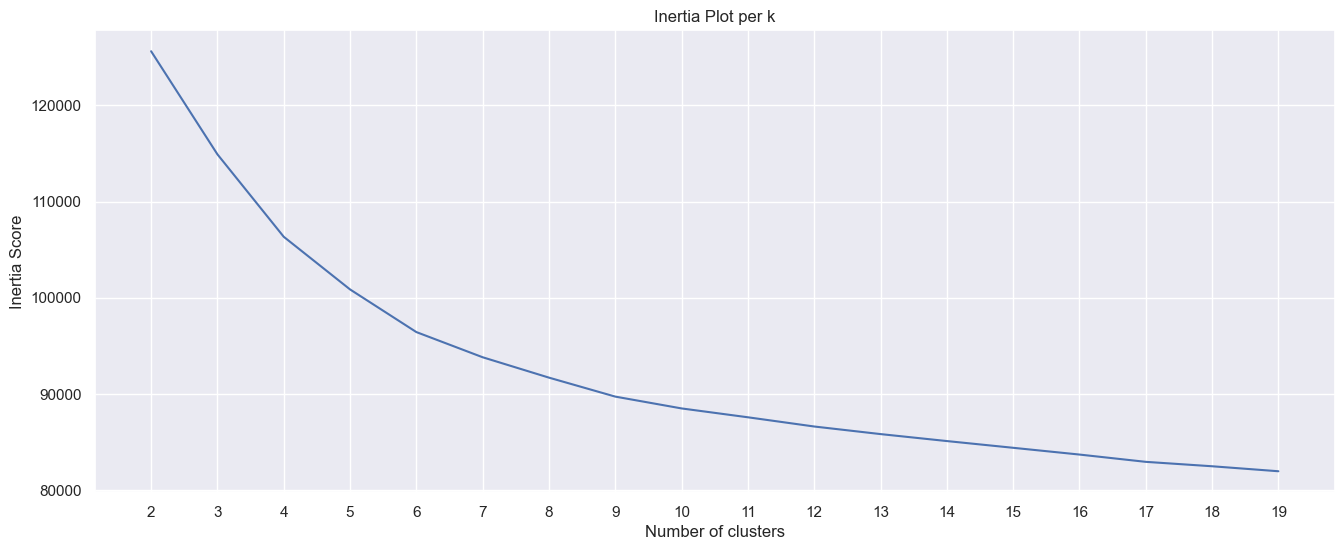

In [81]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [82]:
# Running K means on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [83]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [84]:
predictions

array([2, 2, 2, ..., 2, 0, 2])

In [85]:
new_raw_data.shape

(14778, 86)

## 7.0 Running Principal Component Analysis (PCA) to Visualize & improve results

Explained variance ratio (first two components): [0.16735568 0.07817705]


<Figure size 800x600 with 0 Axes>

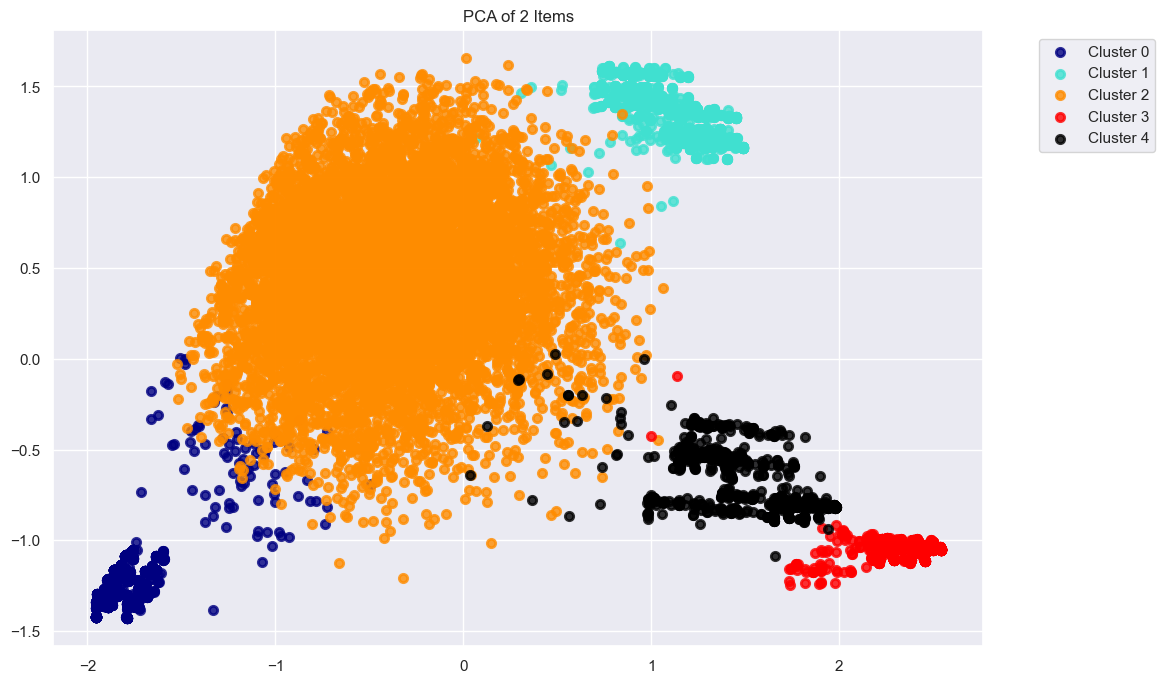

In [86]:
# Running PCA to Visualize the data
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PercentAge of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

### Why dimensionality reduction could help k-means perform better: 

- Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. This is where PCA comes in since it whitens your data. 


- By doing this, you will remove global correlation which can sometimes give better results. K-means is a "least squares" optimization problem; same with PCA. 


- Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. The first eigenvector has the largest variance (smallest inertia), hence splitting on this vector (which shows the cluster membership - not input data coordinates) means maximization of cluster variance; better fit for Kmeans. 


- By maximizing between cluster variance, you minimize within-cluster variance. Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans


### 7.1. Identifying the "best" number of components

Total Variance in our dataset is:  9.789277508428578
The 95% variance we want to have is:  9.29981363300715

Variance explain with 30 n_compononets:  7.800063287617351
Variance explain with 35 n_compononets:  8.200059944222126
Variance explain with 40 n_compononets:  8.559358189926291
Variance explain with 41 n_compononets:  8.625206072416157
Variance explain with 50 n_compononets:  9.1572220656012
Variance explain with 53 n_compononets:  9.301801997586802
Variance explain with 55 n_compononets:  9.39152819059344
Variance explain with 60 n_compononets:  9.592274980903573


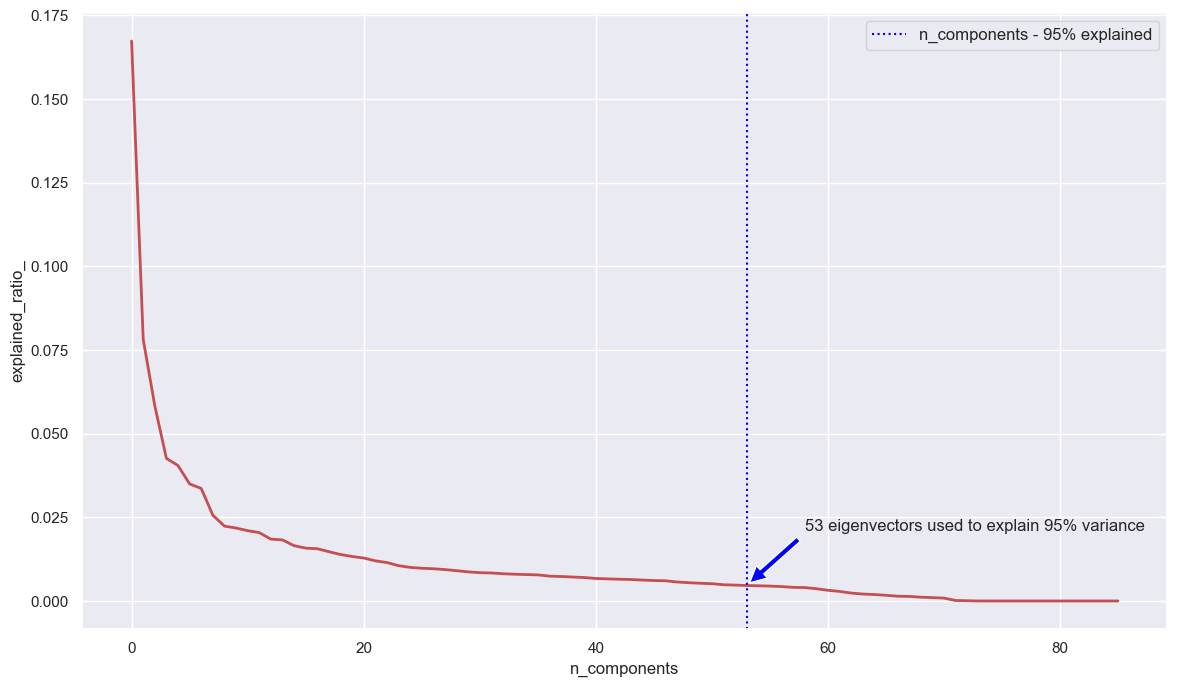

In [87]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()




The innertia for : 2 Clusters is: 118418.0053343995
The innertia for : 3 Clusters is: 107706.73804798855
The innertia for : 4 Clusters is: 99150.89658689548
The innertia for : 5 Clusters is: 94717.71454592943
The innertia for : 6 Clusters is: 89259.98846975304
The innertia for : 7 Clusters is: 87032.31815907745
The innertia for : 8 Clusters is: 84734.2526517551
The innertia for : 9 Clusters is: 82901.43389426019
The innertia for : 10 Clusters is: 81675.79302907932
The innertia for : 11 Clusters is: 80363.07116110735
The innertia for : 12 Clusters is: 79645.57849749774
The innertia for : 13 Clusters is: 78836.55417592356
The innertia for : 14 Clusters is: 77765.06416907415
The innertia for : 15 Clusters is: 77471.39025517246
The innertia for : 16 Clusters is: 76646.93730762885
The innertia for : 17 Clusters is: 75782.7240216464
The innertia for : 18 Clusters is: 75256.9548384841
The innertia for : 19 Clusters is: 74707.75842734546


Text(0.5, 1.0, 'Inertia Plot per k')

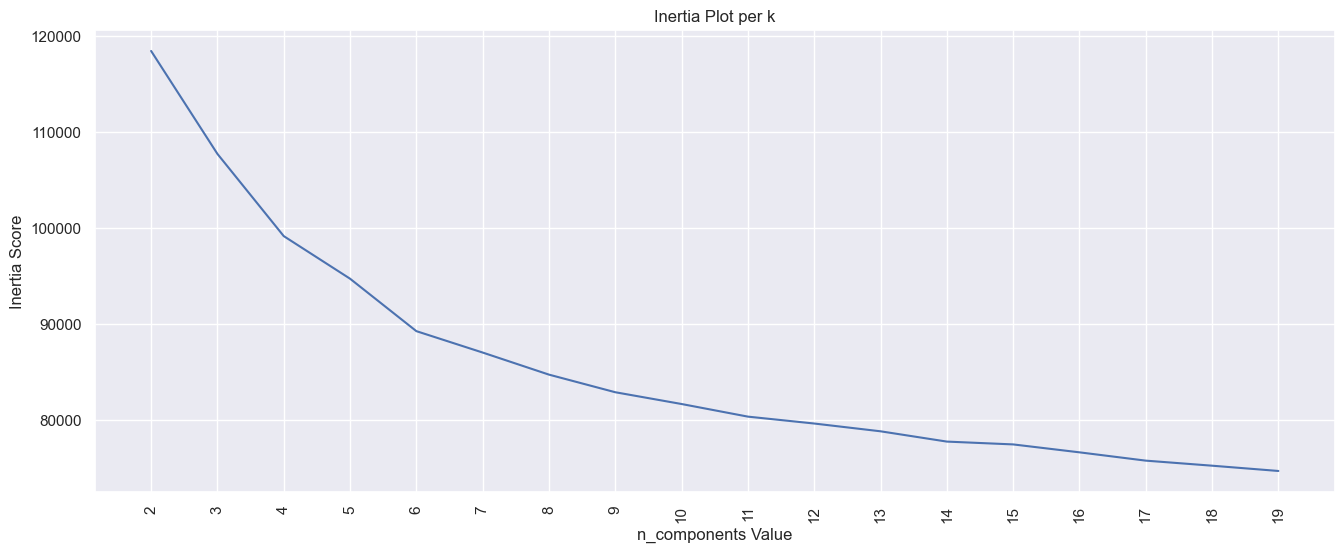

In [88]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We managed to improve our results by reducing inertia


## 8.0. Another way of "Improving" results Could* be to Clean/Combine Variables

In [89]:
# Visualizing all of your variables / columns
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How_often_you_attend_Entertaining_events_in_a_year_1 Times a Year',
       'How_often_you_attend_Entertai

In [90]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", new_raw_data.shape)

# Cleaning the "How_often_you_attend_Entertaining_events_in_a_year" column

# 1-2 times
new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_1 Times a Year'] == 1) |     (new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_4 Times a Year'] == 1) | (new_raw_data['How_often_you_attend_Entertaining_events_in_a_year_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "Social_Media" column

# half a day + more than half a day
new_raw_data['Social_Media_Half a day plus'] = 0
new_raw_data['Social_Media_Half a day plus'][(new_raw_data['Social_Media_Half a day'] == 1) | (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "How_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour'] == 1) | (new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours'] == 1) | (new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours'] == 1) | (new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "Do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['Do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1) | (new_raw_data['Do_you_enjoy_adrenaline_rush_activities_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['Do_you_enjoy_adrenaline_rush_activities_Mostly disagree'] == 1) | (new_raw_data['Do_you_enjoy_adrenaline_rush_activities_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)





The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


In [91]:
# Cleaning the "Are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree'] == 1) | (new_raw_data['Do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree'] == 1) | (new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree'] == 1) | (new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)



# Cleaning the "Were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree'] == 1) | (new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree'] == 1) | (new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree'] == 1) | (new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "Would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
new_raw_data['Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['Would_you_recommend_our_events_to_other_people_Mostly Unlikely'] == 1) | (new_raw_data['Would_you_recommend_our_events_to_other_people_Somewhat Unlikely'] == 1) | (new_raw_data['Would_you_recommend_our_events_to_other_people_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "Did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['Did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['Did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data['Did_you_find_our_events_value_for_money_Somewhat agree'] == 1) | (new_raw_data['Did_you_find_our_events_value_for_money_Mostly agree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


In [92]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How_often_you_attend_Entertaining_events_in_a_year_1 Times a Year',
       'How_often_you_attend_Entertaining_events_in_a_year_2 Times a Year',
       'How_often_you_attend_Entertaining_events_in_a_year_3 Times a Year',
       'How_often_you_attend_Entertaining_events_in_a_year_4 Times a Year',
       'How_often_you_attend_Entertaining_events_in_a_year_5+ Times a Year',
       'Social_Media_Half a day', 'Social_Media_I dont spend any time at all',
       'Social_Media_More than half a day', 'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event_Depends from the Event',
       'Do_you_enjoy_adrenaline_rush_activities_Entirely agree',
       'Do_you_enjoy_adrenaline_rush_activities_Entirely disagree',
       'Do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       'Do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       'Do_you_enjoy_adrenaline_rush_activities_Neither agree nor disagree',
       'Do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       'Do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Neither agree nor disagree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree',
       'What_is_your_favourite_attraction_from_below_Crazy rollercoaster ride',
       'What_is_your_favourite_attraction_from_below_Happy Rollercoaster',
       'What_is_your_favourite_attraction_from_below_Ice Bar',
       'What_is_your_favourite_attraction_from_below_Ice skating',
       'What_is_your_favourite_attraction_from_below_Kids Playground',
       'What_is_your_favourite_attraction_from_below_Tree climbing',
       'What_is_your_favourite_attraction_from_below_Wooden Bar',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely agree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly agree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree',
       'Would_you_recommend_our_events_to_other_people_Mostly Likely',
       'Would_you_recommend_our_events_to_other_people_Mostly Unlikely',
       'Would_you_recommend_our_events_to_other_people_Neither agree nor disagree',
       'Would_you_recommend_our_events_to_other_people_Somewhat Likely',
       'Would_you_recommend_our_events_to_other_people_Somewhat Unlikely',
       'Would_you_recommend_our_events_to_other_people_Very Likely',
       'Would_you_recommend_our_events_to_other_people_Very Unlikely',
       'Did_you_find_our_events_value_for_money_Entirely agree',
       'Did_you_find_our_events_value_for_money_Entirely disagree',
       'Did_you_find_our_events_value_for_money_Mostly agree',
       'Did_you_find_our_events_value_for_money_Mostly disagree',
       'Did_you_find_our_events_value_for_money_Neither agree nor disagree',
       'Did_you_find_our_events_value_for_money_Somewhat agree',
       'Did_you_find_our_events_value_for_money_Somewhat disagree',
       'How_often_you_attend_Entertaining_events_in_a_year_1_or_2_times',
       'How_often_you_attend_Entertaining_events_in_a_year_4_or_5_times',
       'Social_Media_Half a day plus',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
       'Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
       'Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'Did_you_find_our_events_value_for_money Mostly & Somewhat agree']

In [93]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How_often_you_attend_Entertaining_events_in_a_year_1 Times a Year',
       'How_often_you_attend_Entertai

The innertia for : 2 Clusters is: 153834.84794906335
The innertia for : 3 Clusters is: 139776.7229841471
The innertia for : 4 Clusters is: 128998.85522994807
The innertia for : 5 Clusters is: 123369.58442409658
The innertia for : 6 Clusters is: 117784.55241694217
The innertia for : 7 Clusters is: 114360.409774984
The innertia for : 8 Clusters is: 111209.86866923435
The innertia for : 9 Clusters is: 109049.10591205658
The innertia for : 10 Clusters is: 107431.22858544537
The innertia for : 11 Clusters is: 106115.79776739559
The innertia for : 12 Clusters is: 104463.78252853514
The innertia for : 13 Clusters is: 103322.2815410672
The innertia for : 14 Clusters is: 102092.41029420514
The innertia for : 15 Clusters is: 101102.67680116347
The innertia for : 16 Clusters is: 100128.92769561285
The innertia for : 17 Clusters is: 99314.4115964283
The innertia for : 18 Clusters is: 98149.30007339011
The innertia for : 19 Clusters is: 97605.87336164368
The innertia for : 20 Clusters is: 96971.914

Text(0.5, 1.0, 'Inertia Plot per k')

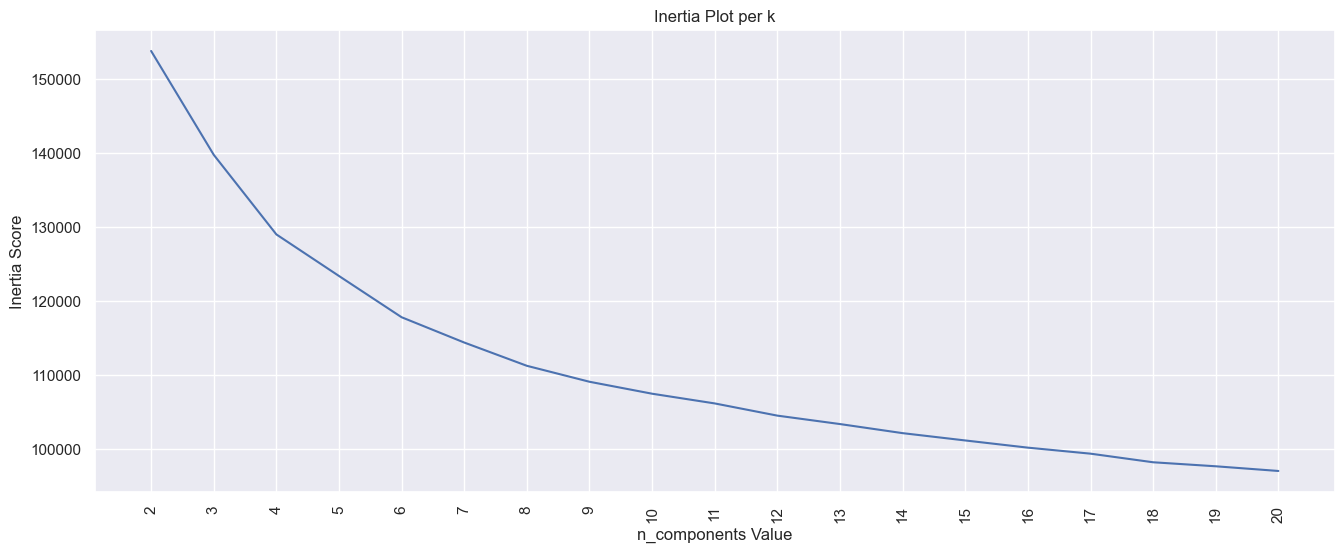

In [94]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion:
- The intertia improved vs the initial run before PCA and Vs the PCA run - Now we want to apply both

### 8.1. Running PCA on New Dataset after grouping

Explained variance ratio (first two components): [0.17257834 0.08690049]


<Figure size 800x600 with 0 Axes>

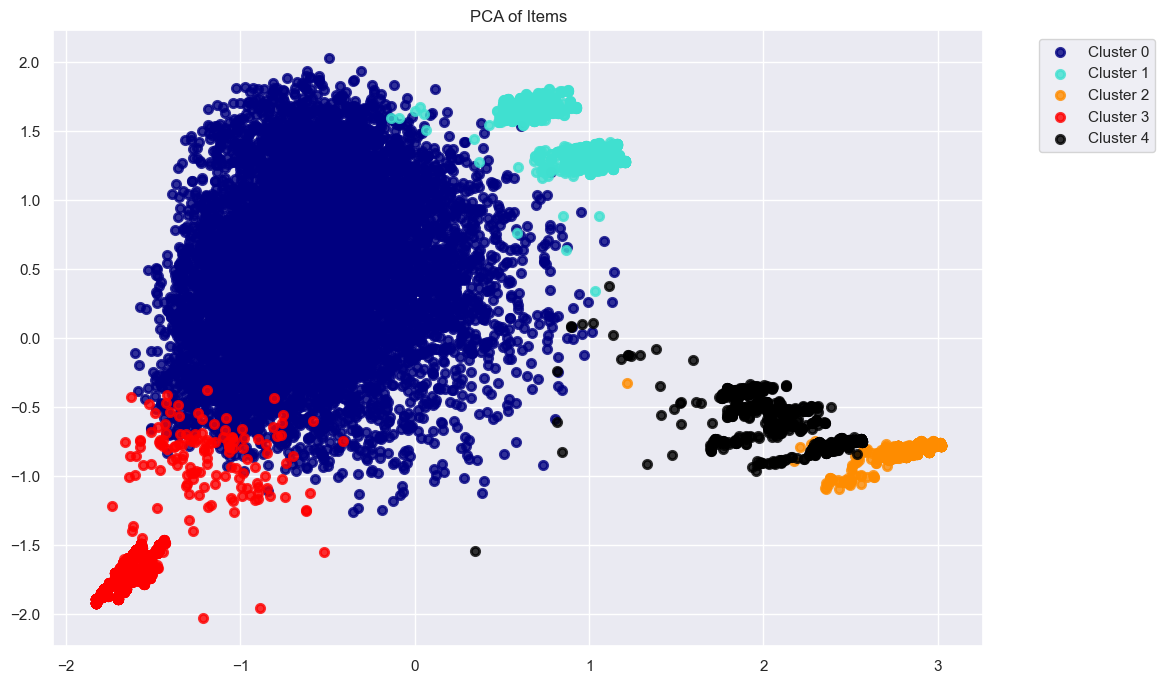

In [95]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PercentAge of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  12.146807338398732
The 95% variance we want to have is:  11.539466971478795

Variance explain with 30 n_compononets:  9.934947091634445
Variance explain with 35 n_compononets:  10.388785389344482
Variance explain with 36 n_compononets:  10.471698888340093
Variance explain with 40 n_compononets:  10.787217477994
Variance explain with 41 n_compononets:  10.863095332587436
Variance explain with 50 n_compononets:  11.449162403197887


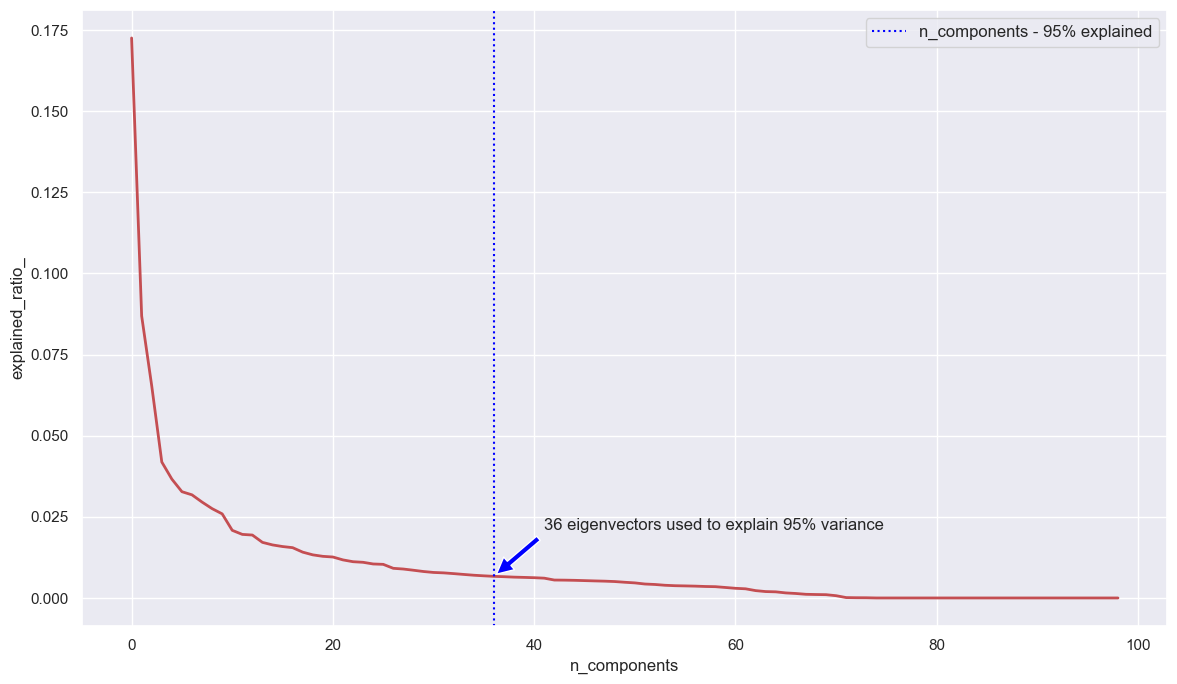

In [96]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 128478.56645146858
The innertia for : 3 Clusters is: 114972.77040576359
The innertia for : 4 Clusters is: 104219.02988966746
The innertia for : 5 Clusters is: 98629.48099582788
The innertia for : 6 Clusters is: 93085.48789531665
The innertia for : 7 Clusters is: 89939.3089324537
The innertia for : 8 Clusters is: 86525.61877777443
The innertia for : 9 Clusters is: 84385.76196883367
The innertia for : 10 Clusters is: 82710.2587317706
The innertia for : 11 Clusters is: 81070.32596851359
The innertia for : 12 Clusters is: 79817.68017489433
The innertia for : 13 Clusters is: 78519.40163665463
The innertia for : 14 Clusters is: 77518.78649361183
The innertia for : 15 Clusters is: 76608.81483059023
The innertia for : 16 Clusters is: 75711.81717755004
The innertia for : 17 Clusters is: 74801.22037773093
The innertia for : 18 Clusters is: 73895.06500431827
The innertia for : 19 Clusters is: 73311.29536600191
The innertia for : 20 Clusters is: 72681.51663408079


Text(0.5, 1.0, 'Inertia Plot per k')

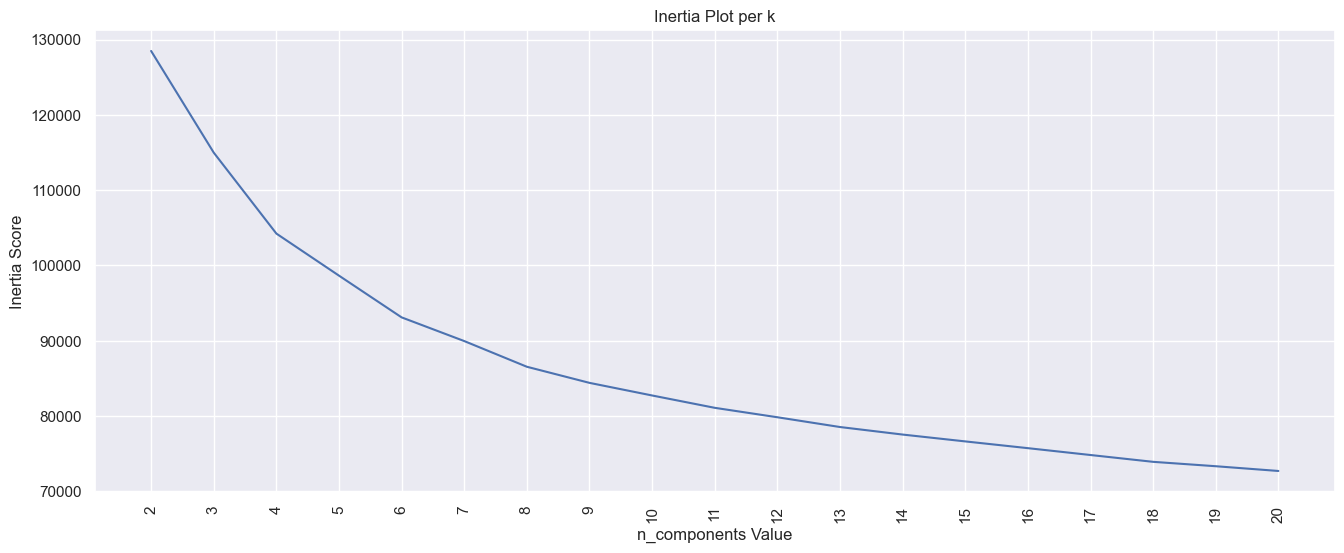

In [97]:
# Running PCA again

pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We manAged to improve our results further more; from 91318 to 80676 with 5 clusters


## 9. Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [98]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
data['Clusters'] = clusters

# Creating a cluster Category
data['Clusters Category'] = 'No Data'
data['Clusters Category'].loc[data['Clusters'] == 0] = 'Cluster 1'
data['Clusters Category'].loc[data['Clusters'] == 1] = 'Cluster 2'
data['Clusters Category'].loc[data['Clusters'] == 2] = 'Cluster 3'
data['Clusters Category'].loc[data['Clusters'] == 3] = 'Cluster 4'
data['Clusters Category'].loc[data['Clusters'] == 4] = 'Cluster 5'

data.head(5)

,CUSTOMER,Age,Gender,Postcode,District,Constituency,Current_Status,Total_Household_Income,How_often_you_attend_Entertaining_events_in_a_year,Social_Media,How_many_hours_are_you_willing_to_travel_to_attend_an_event,Do_you_enjoy_adrenaline_rush_activities,Are_food_areas_coffee_areas_bars_toilets_important_to_you,What_is_your_favourite_attraction_from_below,Were_you_satisfied_with_the_last_event_you_attended_with_us,Would_you_recommend_our_events_to_other_people,Did_you_find_our_events_value_for_money,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,2,Cluster 3
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,2,Cluster 3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,2,Cluster 3
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,0,Cluster 1
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,1,Cluster 2


In [99]:
#data['Do_you_enjoy_adrenaline_rush_activities'].unique()

data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'Current_Status', 'Total_Household_Income',
       'How_often_you_attend_Entertaining_events_in_a_year', 'Social_Media',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'Do_you_enjoy_adrenaline_rush_activities',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'What_is_your_favourite_attraction_from_below',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us',
       'Would_you_recommend_our_events_to_other_people',
       'Did_you_find_our_events_value_for_money', 'Clusters',
       'Clusters Category'],
      dtype='object')

In [100]:
# Creating an order for Household Income

data['Household Income Order'] = 0
data['Household Income Order'].loc[data['Total_Household_Income'] == 'Less than 20,000'] = 1
data['Household Income Order'].loc[data['Total_Household_Income'] == '20,000 to 34,999'] = 2
data['Household Income Order'].loc[data['Total_Household_Income'] == '35,000 to 49,999'] = 3
data['Household Income Order'].loc[data['Total_Household_Income'] == '50,000 to 74,999'] = 4
data['Household Income Order'].loc[data['Total_Household_Income'] == '75,000 to 99,999'] = 5
data['Household Income Order'].loc[data['Total_Household_Income'] == '100,000 to 149,999'] = 6
data['Household Income Order'].loc[data['Total_Household_Income'] == '150,000 to 199,999'] = 7
data['Household Income Order'].loc[data['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
data['Social_Media'] = data['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
data['Social Media Time Spend Order'] = 0
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'I dont spend any time at all'] = 1
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Up to 1 hour'] = 2
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Up to 2 hours'] = 3
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'Half a day'] = 4
data['Social Media Time Spend Order'].loc[data['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
data['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely agree'] = 1
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly agree'] = 2
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat agree'] = 3
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Neither agree nor disagree'] = 4
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat disagree'] = 5
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly disagree'] = 6
data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[data['Are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely disagree'] = 7

# Creating an order for Do_you_enjoy_adrenaline_rush_activities
data['enjoy_adrenaline_rush_activities Agree Order'] = 0
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Entirely agree'] = 1
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Mostly agree'] = 2
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat agree'] = 3
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Neither agree nor disagree'] = 4
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat disagree'] = 5
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Mostly disagree'] = 6
data['enjoy_adrenaline_rush_activities Agree Order'].loc[data['Do_you_enjoy_adrenaline_rush_activities'] == 'Entirely disagree'] = 7

# Creating an order for Were_you_satisfied_with_the_last_event_you_attended_with_us
data['Satisfied Agree Order'] = 0
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely agree'] = 1
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly agree'] = 2
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat agree'] = 3
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Neither agree nor disagree'] = 4
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat disagree'] = 5
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly disagree'] = 6
data['Satisfied Agree Order'].loc[data['Were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely disagree'] = 7

# Creating an order for Did_you_find_our_events_value_for_money
data['Value_for_money Agree Order'] = 0
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Entirely agree'] = 1
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Mostly agree'] = 2
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Somewhat agree'] = 3
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Neither agree nor disagree'] = 4
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Somewhat disagree'] = 5
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Mostly disagree'] = 6
data['Value_for_money Agree Order'].loc[data['Did_you_find_our_events_value_for_money'] == 'Entirely disagree'] = 7


# Creating an order for Would_you_recommend_our_events_to_other_people
data['Recommend Order'] = 0
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Very Likely'] = 1
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Mostly Likely'] = 2
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Somewhat Likely'] = 3
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Neither agree nor disagree'] = 4
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Somewhat Unlikely'] = 5
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Mostly Unlikely'] = 6
data['Recommend Order'].loc[data['Would_you_recommend_our_events_to_other_people'] == 'Very Unlikely'] = 7




In [101]:
data.dtypes

CUSTOMER                                                       object
Age                                                            object
Gender                                                         object
Postcode                                                       object
District                                                       object
Constituency                                                   object
Current_Status                                                 object
Total_Household_Income                                         object
How_often_you_attend_Entertaining_events_in_a_year             object
Social_Media                                                   object
How_many_hours_are_you_willing_to_travel_to_attend_an_event    object
Do_you_enjoy_adrenaline_rush_activities                        object
Are_food_areas_coffee_areas_bars_toilets_important_to_you      object
What_is_your_favourite_attraction_from_below                   object
Were_you_satisfied_w

In [102]:
data.to_sql('Events_Cluster_Output', con=conn, if_exists='replace', index=False)

58

In [104]:
# Exporting the data in a CSV
#data.to_csv('Events_Cluster_Output', sep='\t')